# LAB - 03
Name: Ch. Durga Priya

Reg No : BL.EN.U4AIE21045

AIE - D sec

In [6]:
import librosa
import soundfile as sf
import numpy as np
import librosa.display
import matplotlib.pyplot as plt
import IPython.display as ipd

In [7]:
statement = r"C:\Users\Durga Priya\OneDrive\Desktop\statement.wav" 
question = r"C:\Users\Durga Priya\OneDrive\Desktop\Question.wav"     

In [8]:
# A1. Trim silence from the beginning and ending of the recorded signal

Original Audio for statement:


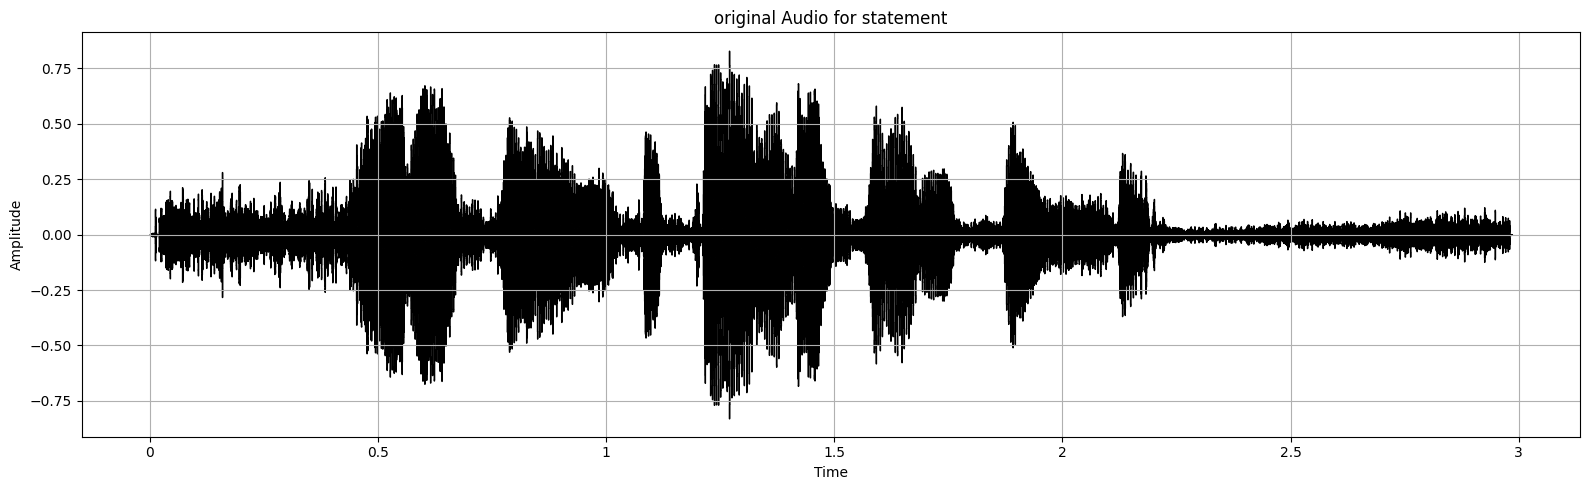

Trimmed Audio for statement:


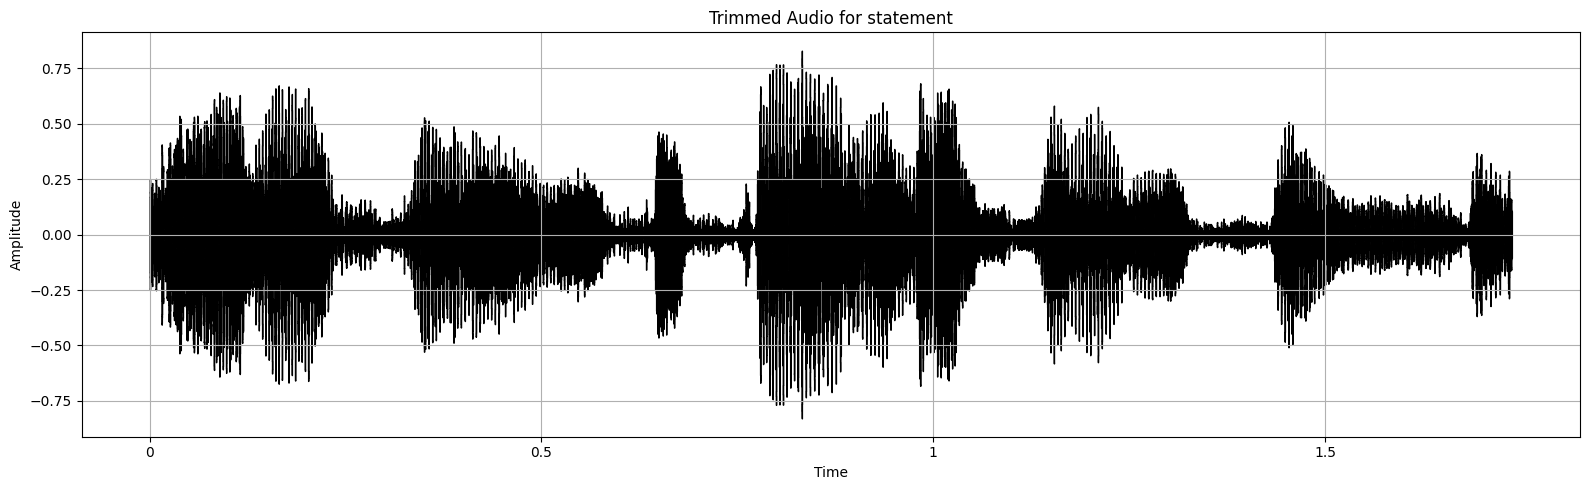

Original Audio for question:


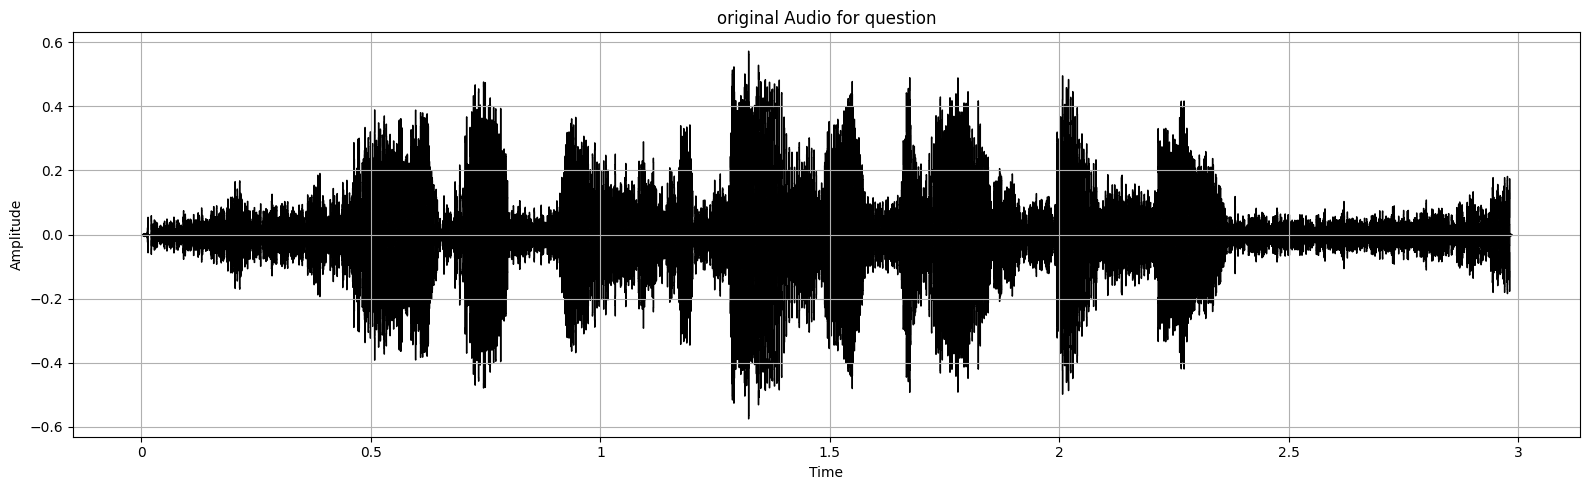

Trimmed Audio for question:


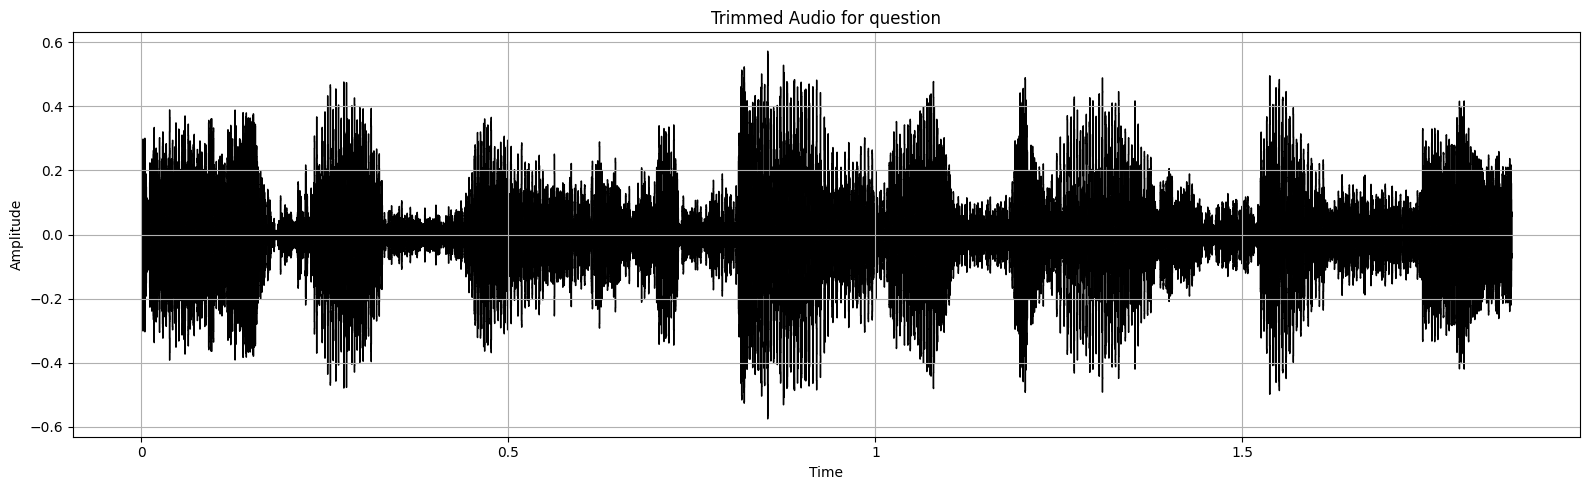

In [9]:
signal, sr = librosa.load(statement, sr=None)
signal1, sr1 = librosa.load(question, sr=None)
 
print("Original Audio for statement:")
ipd.display(ipd.Audio(statement))

plt.figure(figsize=(16, 5))
librosa.display.waveshow(signal, sr=sr,color='black')
plt.title('original Audio for statement')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.tight_layout()
plt.show()

trimmed_signal, index = librosa.effects.trim(signal, top_db=10)  

print("Trimmed Audio for statement:")
ipd.display(ipd.Audio(trimmed_signal, rate=sr)) 

plt.figure(figsize=(16, 5))
librosa.display.waveshow(trimmed_signal, sr=sr,color='black')
plt.title('Trimmed Audio for statement')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.tight_layout()
plt.show()

print("Original Audio for question:")
ipd.display(ipd.Audio(question))

plt.figure(figsize=(16, 5))
librosa.display.waveshow(signal1, sr=sr,color='black')
plt.title('original Audio for question')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.tight_layout()
plt.show()

trimmed_signal1, index = librosa.effects.trim(signal1, top_db=7) 

print("Trimmed Audio for question:")
ipd.display(ipd.Audio(trimmed_signal1, rate=sr1))  

plt.figure(figsize=(16, 5))
librosa.display.waveshow(trimmed_signal1, sr=sr,color='black')
plt.title('Trimmed Audio for question')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.tight_layout()
plt.show()

In [10]:
# A2. Split the recorded speech with detected silences.

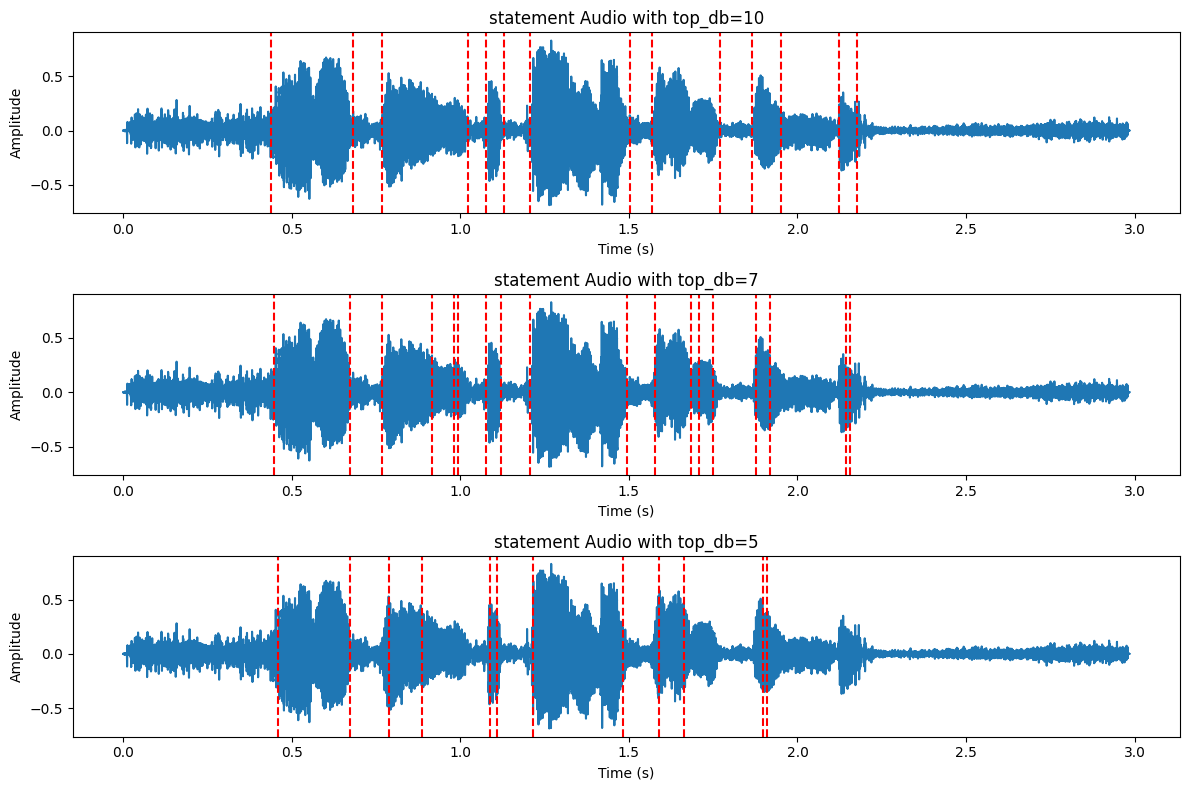

Split statement Audio with top_db=10:


Split statement Audio with top_db=7:


Split statement Audio with top_db=5:


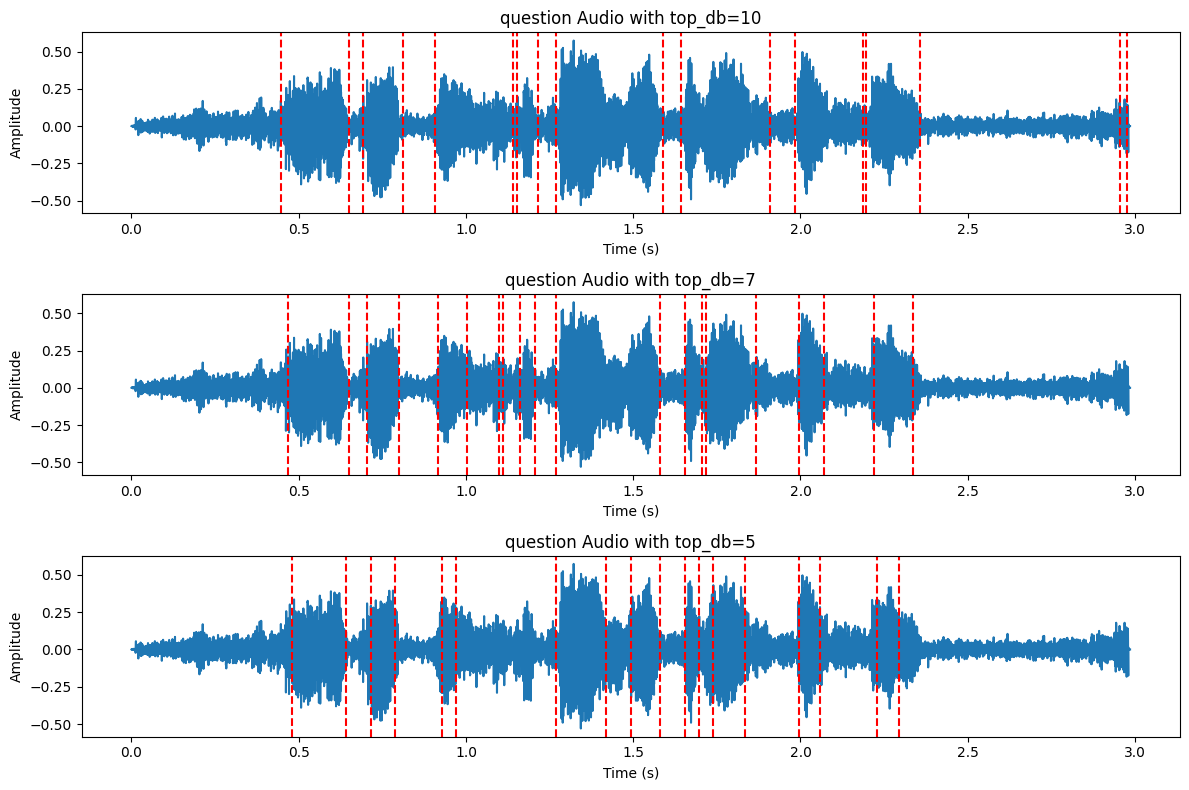

Split question Audio with top_db=10:


Split question Audio with top_db=7:


Split question Audio with top_db=5:


In [27]:
statement = r"C:\Users\Durga Priya\OneDrive\Desktop\statement.wav" 
y, sr = librosa.load(statement, sr=None)
 
top_db_values = [10, 7, 5]  
 
plt.figure(figsize=(12, 8))
 
for i, top_db in enumerate(top_db_values):
    intervals = librosa.effects.split(y, top_db=top_db)
    plt.subplot(len(top_db_values), 1, i + 1)
    plt.plot(np.arange(len(y)) / sr, y)
    plt.title(f'statement Audio with top_db={top_db}')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
 
    for interval in intervals:
        plt.axvline(interval[0] / sr, color='r', linestyle='--')
        plt.axvline(interval[1] / sr, color='r', linestyle='--')

plt.tight_layout()
plt.show()
 
for i, top_db in enumerate(top_db_values):
    intervals = librosa.effects.split(y, top_db=top_db)
    split_audio = np.concatenate([y[start:end] for start, end in intervals])
 
    print(f"Split statement Audio with top_db={top_db}:")
    ipd.display(ipd.Audio(split_audio, rate=sr))
    
question = r"C:\Users\Durga Priya\OneDrive\Desktop\Question.wav"     
y, sr = librosa.load(question, sr=None)
 
top_db_values = [10, 7, 5]  
 
plt.figure(figsize=(12, 8))
 
for i, top_db in enumerate(top_db_values):
    intervals = librosa.effects.split(y, top_db=top_db)
    plt.subplot(len(top_db_values), 1, i + 1)
    plt.plot(np.arange(len(y)) / sr, y)
    plt.title(f'question Audio with top_db={top_db}')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
 
    for interval in intervals:
        plt.axvline(interval[0] / sr, color='r', linestyle='--')
        plt.axvline(interval[1] / sr, color='r', linestyle='--')

plt.tight_layout()
plt.show()
 
for i, top_db in enumerate(top_db_values):
    intervals = librosa.effects.split(y, top_db=top_db)
    split_audio = np.concatenate([y[start:end] for start, end in intervals])
 
    print(f"Split question Audio with top_db={top_db}:")
    ipd.display(ipd.Audio(split_audio, rate=sr))

In [ ]:
# A3. Silence detection output from librosa package.

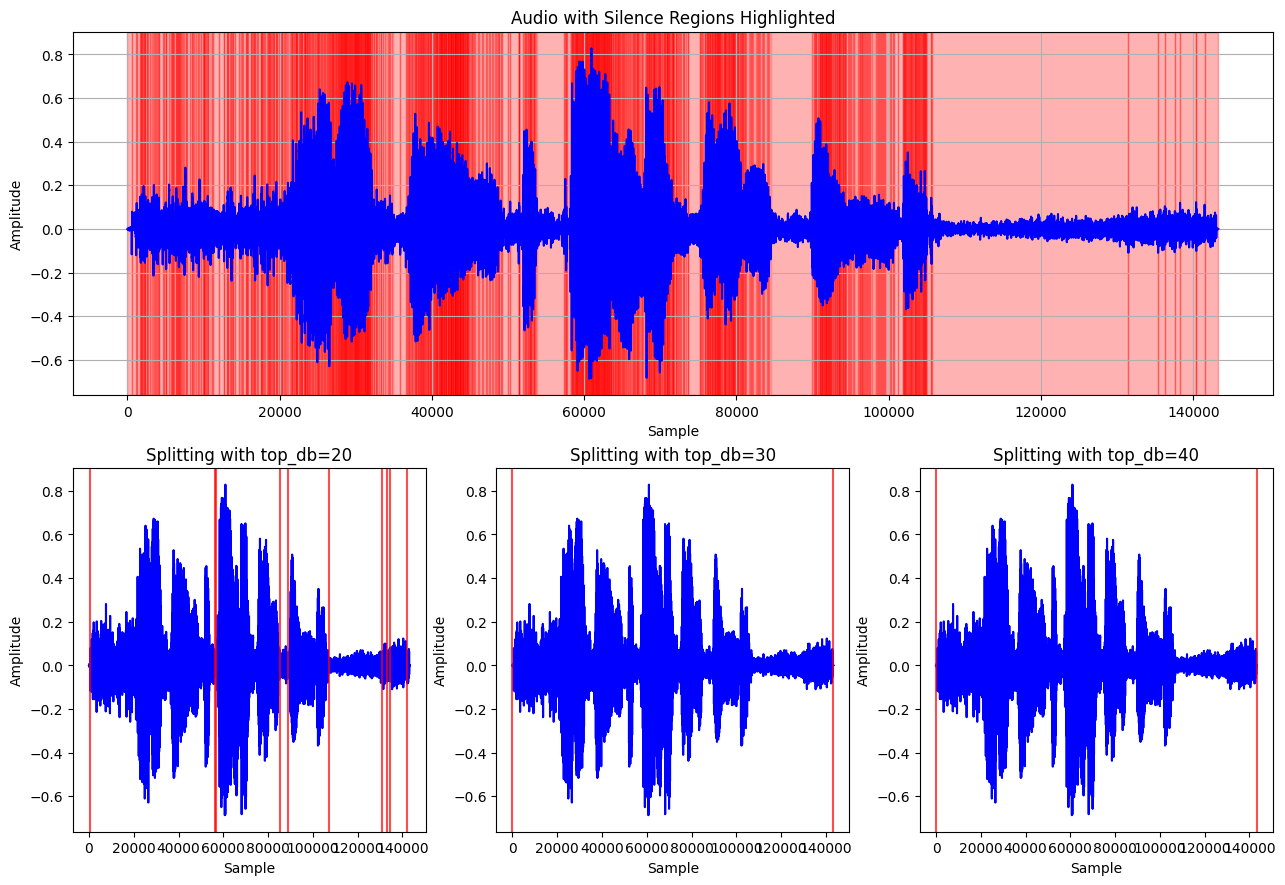

In [24]:
def calculate_energy(signal):
    squared_signal = np.square(signal)  # Calculate the squared signal
    energy = np.sum(squared_signal)  # Calculate the total energy by summing the squared samples
    return energy
 
# Function to detect silence based on energy threshold
def detect_silence(signal, threshold):
    energy = calculate_energy(signal)
    if energy < threshold:  # If the energy is below the threshold, consider it as silence
        return True
    else:
        return False
    
file_path = r"C:\Users\Durga Priya\OneDrive\Desktop\statement.wav" 
audio_signal, sample_rate = librosa.load(file_path, sr=None)
 
# Defining an energy threshold for silence detection
energy_threshold = 0.01
 
# For silence regions in the audio
silence_regions = []
current_region = []
for i, sample in enumerate(audio_signal):
    if detect_silence(sample, energy_threshold):
        current_region.append(i)
    elif current_region:
        silence_regions.append(current_region)
        current_region = []
if current_region:
    silence_regions.append(current_region)
top_db_values = [20, 30, 40]
plt.figure(figsize=(15, 10))
plt.subplot(2, 1, 1)
plt.plot(audio_signal, color='b')
for region in silence_regions:
    plt.axvspan(region[0], region[-1], color='r', alpha=0.3)
plt.title("Audio with Silence Regions Highlighted")
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.grid(True)
 
for i, top_db in enumerate(top_db_values):
    plt.subplot(2, len(top_db_values), len(top_db_values) + i + 1)
    split_audio_intervals = librosa.effects.split(audio_signal, top_db=top_db)
    plt.plot(audio_signal, color='b')
    for interval in split_audio_intervals:
        plt.axvline(interval[0], color='r', linestyle='-', alpha=0.7)
        plt.axvline(interval[1], color='r', linestyle='-', alpha=0.7)
    plt.title(f"Splitting with top_db={top_db}")
    plt.xlabel("Sample")
    plt.ylabel("Amplitude")
    plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

plt.show() 